In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

kyoto_bloom_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/data/kyoto.csv")

In [3]:
kyoto_bloom_data.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,kyoto,35.011983,135.676114,44,812,0812-04-01,92
1,kyoto,35.011983,135.676114,44,815,0815-04-15,105
2,kyoto,35.011983,135.676114,44,831,0831-04-06,96
3,kyoto,35.011983,135.676114,44,851,0851-04-18,108
4,kyoto,35.011983,135.676114,44,853,0853-04-14,104


In [4]:
kyoto_weather_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/kyoto.csv")

In [5]:
kyoto_weather_data.head()

,,,,,,"KYOTO, JA (JA000047759)"
Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
1951-01-01,NaN,46,34,0.00,NaN,NaN
1951-01-02,NaN,44,30,0.00,NaN,NaN
1951-01-03,NaN,47,26,0.00,NaN,NaN
1951-01-04,NaN,41,29,0.00,NaN,NaN


In [6]:
kyoto_weather_df = kyoto_weather_data.drop(kyoto_weather_data.columns[0], axis=1).reset_index()
header = kyoto_weather_df.iloc[0]
kyoto_weather_df = kyoto_weather_df[1:]
kyoto_weather_df.columns = header
kyoto_weather_df = kyoto_weather_df.reset_index(drop=True)

In [7]:
kyoto_weather_df.head()

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches)
0,1951-01-01,NaN,46,34,0.00,NaN
1,1951-01-02,NaN,44,30,0.00,NaN
2,1951-01-03,NaN,47,26,0.00,NaN
3,1951-01-04,NaN,41,29,0.00,NaN
4,1951-01-05,NaN,45,35,0.00,NaN


In [8]:
# Kyoto
# Winter: Dec 1 - Feb 28
# Spring: March 1 - May 31
# Summer: June 1 - August 31
# Autumn: September 1 - November 30

# function to find season from month
def find_season(date):
  season_month = {
      '12':'Winter-EOY', '01':'Winter-BOY', '02':'Winter-BOY',  # end-of-year winter and beginning-of-year winter
      '03':'Spring', '04':'Spring', '05':'Spring',
      '06':'Summer', '07':'Summer', '08':'Summer',
      '09':'Autumn', '10':'Autumn', '11':'Autumn'}
  return season_month.get(date[5:-3])

# applys season function
kyoto_weather_df["season"] = kyoto_weather_df["Date"].astype(str).apply(find_season)

# extracts year from date
kyoto_weather_df["year"] = kyoto_weather_df["Date"].astype(str).apply(lambda date: date[:4])

# drops date column
kyoto_weather_df = kyoto_weather_df.drop(["Date"], axis=1)

In [9]:
# formates to better datatypes
kyoto_weather_df["TAVG (Degrees Fahrenheit)"] = kyoto_weather_df["TAVG (Degrees Fahrenheit)"].astype(float)
kyoto_weather_df["TMAX (Degrees Fahrenheit)"] = kyoto_weather_df["TMAX (Degrees Fahrenheit)"].astype(float)
kyoto_weather_df["TMIN (Degrees Fahrenheit)"] = kyoto_weather_df["TMIN (Degrees Fahrenheit)"].astype(float)
kyoto_weather_df["PRCP (Inches)"] = kyoto_weather_df["PRCP (Inches)"].astype(float)
kyoto_weather_df["SNOW (Inches)"] = kyoto_weather_df["SNOW (Inches)"].astype(float)
kyoto_weather_df["year"] = kyoto_weather_df["year"].astype(int)

In [10]:
kyoto_weather_df

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
0,NaN,46.0,34.0,0.00,NaN,Winter-BOY,1951
1,NaN,44.0,30.0,0.00,NaN,Winter-BOY,1951
2,NaN,47.0,26.0,0.00,NaN,Winter-BOY,1951
3,NaN,41.0,29.0,0.00,NaN,Winter-BOY,1951
4,NaN,45.0,35.0,0.00,NaN,Winter-BOY,1951
...,...,...,...,...,...,...,...
25425,37.0,48.0,NaN,0.10,NaN,Winter-BOY,2022
25426,36.0,44.0,32.0,0.02,NaN,Winter-BOY,2022
25427,37.0,48.0,NaN,0.00,NaN,Winter-BOY,2022
25428,37.0,44.0,30.0,0.00,NaN,Winter-BOY,2022


In [11]:
# adds data of previous december to current year's winter
kyoto_weather_df["year"] = kyoto_weather_df[["season","year"]].apply(lambda x: x["year"] + 1 if x["season"] == "Winter-EOY" else x["year"], axis=1)

# standardizes all winters
kyoto_weather_df["season"] = kyoto_weather_df["season"].replace(to_replace=["Winter-EOY", "Winter-BOY"], value="Winter")

kyoto_weather_df.head(200)

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
0,NaN,46.0,34.0,0.00,NaN,Winter,1951
1,NaN,44.0,30.0,0.00,NaN,Winter,1951
2,NaN,47.0,26.0,0.00,NaN,Winter,1951
3,NaN,41.0,29.0,0.00,NaN,Winter,1951
4,NaN,45.0,35.0,0.00,NaN,Winter,1951
...,...,...,...,...,...,...,...
195,NaN,78.0,71.0,4.40,NaN,Summer,1951
196,NaN,87.0,71.0,0.57,NaN,Summer,1951
197,NaN,75.0,68.0,0.73,NaN,Summer,1951
198,NaN,87.0,68.0,0.00,NaN,Summer,1951


In [12]:
kyoto_weather_df.tail(200)

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
25230,88.0,100.0,NaN,0.00,NaN,Summer,2021
25231,80.0,89.0,NaN,1.54,NaN,Summer,2021
25232,80.0,87.0,NaN,0.02,NaN,Summer,2021
25233,81.0,87.0,73.0,0.00,NaN,Summer,2021
25234,76.0,79.0,NaN,1.69,NaN,Summer,2021
...,...,...,...,...,...,...,...
25425,37.0,48.0,NaN,0.10,NaN,Winter,2022
25426,36.0,44.0,32.0,0.02,NaN,Winter,2022
25427,37.0,48.0,NaN,0.00,NaN,Winter,2022
25428,37.0,44.0,30.0,0.00,NaN,Winter,2022


In [13]:
# groups based on year and season
kyoto_weather_df_grouped = kyoto_weather_df.groupby(["year", "season"]).agg({'TAVG (Degrees Fahrenheit)':'mean',
                                                                 'TMAX (Degrees Fahrenheit)':'max',
                                                                 'TMIN (Degrees Fahrenheit)':'min',
                                                                 'PRCP (Inches)':['sum','mean','median'],
                                                                 'SNOW (Inches)':['sum','mean','median']}).reset_index()

kyoto_weather_df_grouped.head()

0  year  season TAVG (Degrees Fahrenheit)  ... SNOW (Inches)            
                                     mean  ...           sum mean median
0  1951  Autumn                       NaN  ...           0.0  NaN    NaN
1  1951  Spring                       NaN  ...           0.0  NaN    NaN
2  1951  Summer                       NaN  ...           0.0  NaN    NaN
3  1951  Winter                       NaN  ...           0.0  NaN    NaN
4  1952  Autumn                       NaN  ...           0.0  NaN    NaN

[5 rows x 11 columns]

In [14]:
# applys season function
kyoto_bloom_df = kyoto_bloom_data.copy()
kyoto_bloom_df["season"] = kyoto_bloom_df["bloom_date"].astype(str).apply(find_season)

# drops bloom_date column and constant data
kyoto_bloom_df = kyoto_bloom_df.drop(["bloom_date","location", "lat", "long", "alt","season"], axis=1)

In [15]:
kyoto_bloom_df.tail(15)

,year,bloom_doy
818,2007,97
819,2008,95
820,2009,95
821,2010,95
822,2011,99
823,2012,101
824,2013,93
825,2014,94
826,2015,93
827,2016,95


In [16]:
# adds climate data to bloom date
kyoto_merged_df = pd.merge(kyoto_bloom_df, kyoto_weather_df_grouped, on="year", how="outer")

# sets year as index
kyoto_merged_df = kyoto_merged_df.set_index(kyoto_merged_df.columns[0])

# fixes column names
kyoto_merged_df.columns = ['bloom_day', 'season', 'TAVG_mean', 'TMAX_max', 'TMIN_min', 'PRCP_sum', 'PRCP_mean', 'PRCP_median', 'SNOW_sum', 'SNOW_mean', 'SNOW_median']

# removes rows that lack seasonal data
kyoto_merged_df = kyoto_merged_df[kyoto_merged_df['season'].notna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [17]:
kyoto_merged_df

,bloom_day,season,TAVG_mean,TMAX_max,TMIN_min,PRCP_sum,PRCP_mean,PRCP_median,SNOW_sum,SNOW_mean,SNOW_median
year,,,,,,,,,,,
1951,98.0,Autumn,NaN,90.0,29.0,12.41,0.136374,0.0,0.0,NaN,NaN
1951,98.0,Spring,NaN,89.0,24.0,15.37,0.167065,0.0,0.0,NaN,NaN
1951,98.0,Summer,NaN,100.0,53.0,26.36,0.286522,0.0,0.0,NaN,NaN
1951,98.0,Winter,NaN,67.0,22.0,4.93,0.083559,0.0,0.0,NaN,NaN
1952,105.0,Autumn,NaN,92.0,35.0,13.23,0.145385,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,85.0,Autumn,66.388889,91.0,36.0,10.92,0.124091,0.0,0.0,NaN,NaN
2021,85.0,Spring,59.500000,86.0,36.0,22.91,0.251758,0.0,0.0,NaN,NaN
2021,85.0,Summer,79.739130,102.0,59.0,33.93,0.377000,0.0,0.0,NaN,NaN


In [18]:
import numpy as np

# creates dataframe with seasonal variables as columns
seasons = ("Summer", "Winter", "Autumn", "Spring")

new_columns = []
for season in seasons:
  for column in kyoto_merged_df.columns[2:]:
    new_columns.append(f"{season}_{column}")

kyoto_processed_df = pd.DataFrame(columns=new_columns)

for year, row in kyoto_merged_df.iterrows():
  included_cols = []
  new_row = []

  for season in seasons:
    if row["season"] == season:
      for column in kyoto_merged_df.columns[2:]:
        included_cols.append(f"{season}_{column}")
        new_row.append(row[column])
  
  row_df = pd.DataFrame([pd.Series(new_row)], index = [year])
  row_df = row_df.set_axis(included_cols, axis=1, inplace=False)
  
  kyoto_processed_df = pd.concat([row_df, kyoto_processed_df])[kyoto_processed_df.columns]  # preserves column name order

# combines rows
kyoto_processed_df = kyoto_processed_df.groupby(kyoto_processed_df.index)[kyoto_processed_df.columns].first()

# adds bloom doys
kyoto_processed_df.insert(0, "bloom_doy", np.NaN)

for year, row in kyoto_processed_df.iterrows():
  try:
    kyoto_processed_df.loc[year, "bloom_doy"] = int(kyoto_bloom_df.query(f"year=={str(year)}")["bloom_doy"])
  except:
    kyoto_processed_df.loc[year, "bloom_doy"] = np.NaN

kyoto_processed_df = kyoto_processed_df[:-1]

In [19]:
kyoto_processed_df.tail()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Summer_PRCP_mean,Summer_PRCP_median,Summer_SNOW_sum,Summer_SNOW_mean,Summer_SNOW_median,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_PRCP_mean,Winter_PRCP_median,Winter_SNOW_sum,Winter_SNOW_mean,Winter_SNOW_median,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_PRCP_mean,Autumn_PRCP_median,Autumn_SNOW_sum,Autumn_SNOW_mean,Autumn_SNOW_median,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_PRCP_mean,Spring_PRCP_median,Spring_SNOW_sum,Spring_SNOW_mean,Spring_SNOW_median
2017,99.0,79.780220,98.0,55.0,18.81,0.206703,0.0,0.0,NaN,NaN,42.811111,63.0,27.0,7.61,0.084556,0.0,0.0,NaN,NaN,63.593407,90.0,37.0,20.89,0.232111,0.0,0.0,NaN,NaN,58.478261,90.0,32.0,9.87,0.107283,0.0,0.0,NaN,NaN
2018,89.0,81.714286,104.0,57.0,26.28,0.288791,0.0,0.0,NaN,NaN,40.455556,61.0,26.0,3.89,0.043222,0.0,0.0,NaN,NaN,65.155556,91.0,39.0,18.40,0.209091,0.0,0.0,NaN,NaN,60.467391,89.0,33.0,19.17,0.208370,0.0,0.0,NaN,NaN
2019,95.0,79.505495,101.0,62.0,25.89,0.287667,0.0,0.0,NaN,NaN,44.144444,73.0,30.0,4.66,0.051778,0.0,0.0,NaN,NaN,67.373626,98.0,39.0,12.58,0.139778,0.0,0.0,NaN,NaN,58.565217,94.0,34.0,10.37,0.115222,0.0,0.0,NaN,NaN
2020,92.0,80.760870,102.0,62.0,28.51,0.370260,0.0,0.0,NaN,NaN,45.725275,70.0,30.0,6.12,0.069545,0.0,0.0,NaN,NaN,66.098901,98.0,43.0,13.16,0.162469,0.0,0.0,NaN,NaN,57.678161,87.0,32.0,12.02,0.150250,0.0,0.0,NaN,NaN
2021,85.0,79.739130,102.0,59.0,33.93,0.377000,0.0,0.0,NaN,NaN,43.970588,70.0,25.0,4.51,0.073934,0.0,0.0,NaN,NaN,66.388889,91.0,36.0,10.92,0.124091,0.0,0.0,NaN,NaN,59.500000,86.0,36.0,22.91,0.251758,0.0,0.0,NaN,NaN


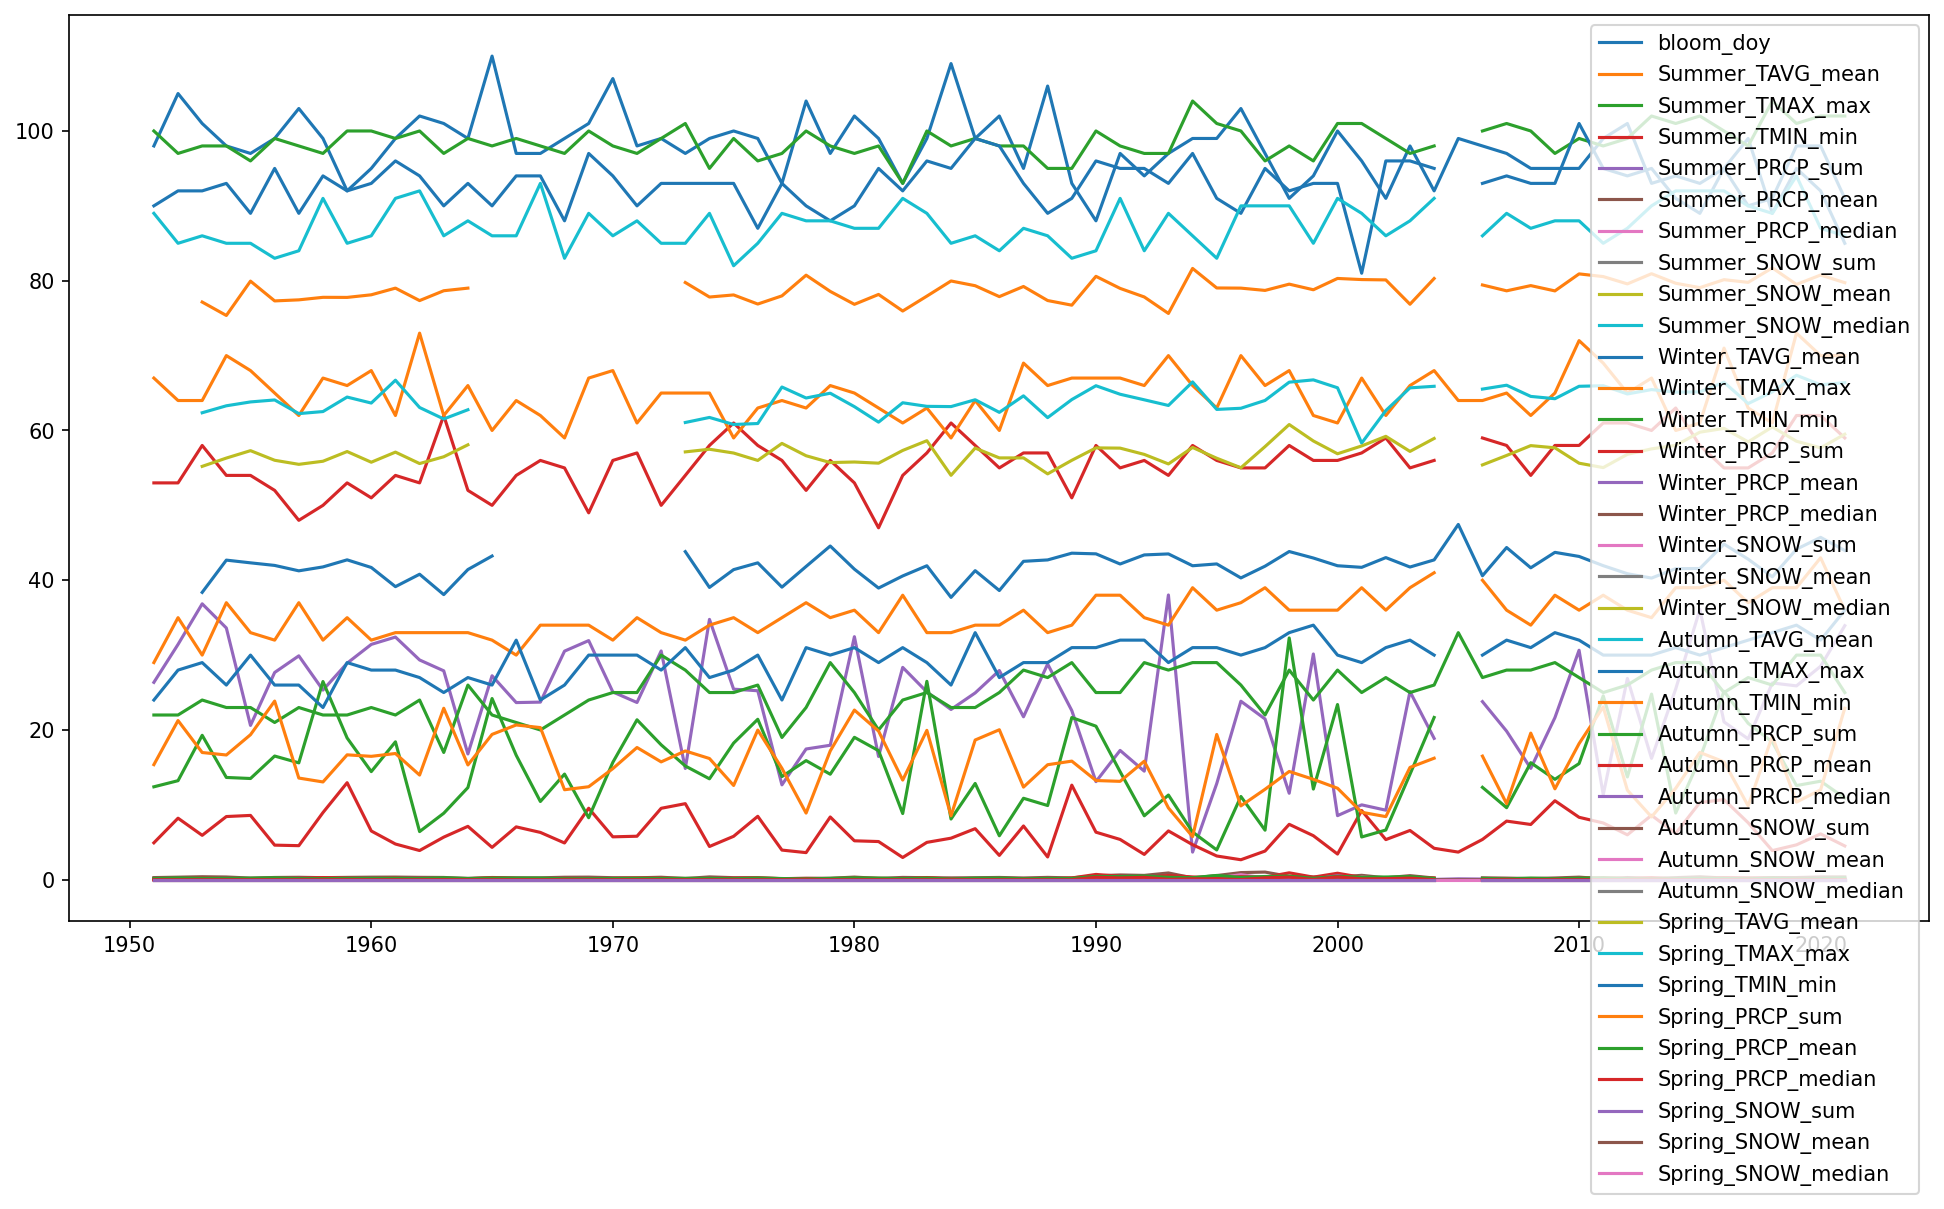

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(kyoto_processed_df)
plt.gca().legend(tuple(kyoto_processed_df.columns), loc='upper right')
plt.show()

In [21]:
kyoto_processed_df.shape

(71, 37)

In [22]:
kyoto_processed_df.head()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Summer_PRCP_mean,Summer_PRCP_median,Summer_SNOW_sum,Summer_SNOW_mean,Summer_SNOW_median,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_PRCP_mean,Winter_PRCP_median,Winter_SNOW_sum,Winter_SNOW_mean,Winter_SNOW_median,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_PRCP_mean,Autumn_PRCP_median,Autumn_SNOW_sum,Autumn_SNOW_mean,Autumn_SNOW_median,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_PRCP_mean,Spring_PRCP_median,Spring_SNOW_sum,Spring_SNOW_mean,Spring_SNOW_median
1951,98.0,NaN,100.0,53.0,26.36,0.286522,0.000,0.0,NaN,NaN,NaN,67.0,22.0,4.93,0.083559,0.0,0.0,NaN,NaN,NaN,90.0,29.0,12.41,0.136374,0.0,0.0,NaN,NaN,NaN,89.0,24.0,15.37,0.167065,0.0,0.0,NaN,NaN
1952,105.0,NaN,97.0,53.0,31.43,0.341630,0.000,0.0,NaN,NaN,NaN,64.0,22.0,8.22,0.090330,0.0,0.0,NaN,NaN,NaN,92.0,35.0,13.23,0.145385,0.0,0.0,NaN,NaN,NaN,85.0,28.0,21.26,0.231087,0.0,0.0,NaN,NaN
1953,101.0,77.152174,98.0,58.0,36.85,0.400543,0.025,0.0,NaN,NaN,38.379310,64.0,24.0,5.93,0.065889,0.0,0.0,NaN,NaN,62.366667,92.0,30.0,19.29,0.211978,0.0,0.0,NaN,NaN,55.206522,86.0,29.0,16.99,0.184674,0.0,0.0,NaN,NaN
1954,98.0,75.358696,98.0,54.0,33.62,0.365435,0.015,0.0,NaN,NaN,42.685393,70.0,23.0,8.44,0.093778,0.0,0.0,NaN,NaN,63.296703,93.0,37.0,13.66,0.150110,0.0,0.0,NaN,NaN,56.315217,85.0,26.0,16.66,0.181087,0.0,0.0,NaN,NaN
1955,97.0,79.945652,96.0,54.0,20.61,0.224022,0.000,0.0,NaN,NaN,42.322222,68.0,23.0,8.59,0.095444,0.0,0.0,NaN,NaN,63.813187,89.0,33.0,13.52,0.148571,0.0,0.0,NaN,NaN,57.304348,85.0,30.0,19.37,0.210543,0.0,0.0,NaN,NaN


In [23]:
# removes low variance columns
from sklearn.feature_selection import VarianceThreshold

kyoto_imputed_df = kyoto_processed_df.copy()

var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(kyoto_imputed_df)

concol = [column for column in kyoto_imputed_df.columns 
          if column not in kyoto_imputed_df.columns[var_thr.get_support()]]

kyoto_imputed_df = kyoto_imputed_df.drop(concol, axis=1)

print(concol)

['Summer_PRCP_mean', 'Summer_PRCP_median', 'Summer_SNOW_sum', 'Summer_SNOW_mean', 'Summer_SNOW_median', 'Winter_PRCP_mean', 'Winter_PRCP_median', 'Winter_SNOW_sum', 'Winter_SNOW_mean', 'Winter_SNOW_median', 'Autumn_PRCP_mean', 'Autumn_PRCP_median', 'Autumn_SNOW_sum', 'Autumn_SNOW_mean', 'Autumn_SNOW_median', 'Spring_PRCP_mean', 'Spring_PRCP_median', 'Spring_SNOW_sum', 'Spring_SNOW_mean', 'Spring_SNOW_median']


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [24]:
from sklearn.impute import KNNImputer

# knn imputation
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
kyoto_imputed_df = pd.DataFrame(knn_imputer.fit_transform(kyoto_imputed_df), columns = kyoto_imputed_df.columns)

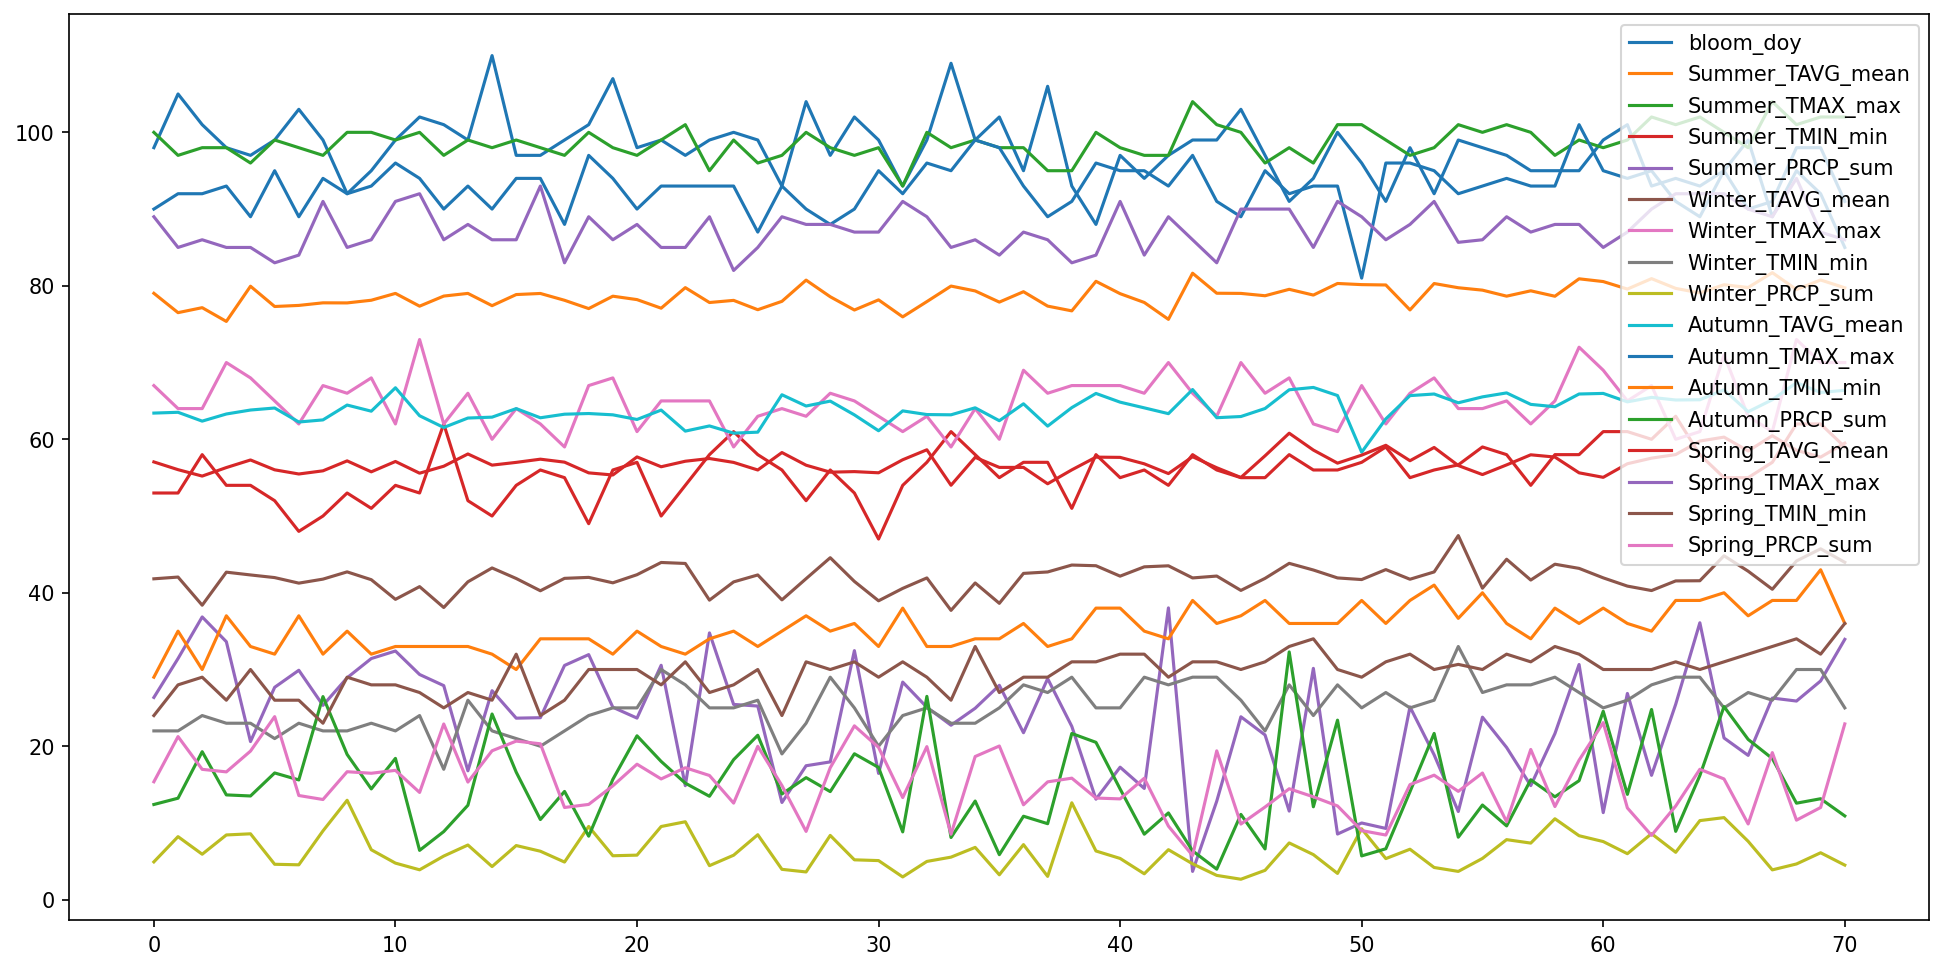

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(kyoto_imputed_df)
plt.gca().legend(tuple(kyoto_imputed_df.columns), loc='upper right')
plt.show()

In [26]:
kyoto_imputed_df.head()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum
0,98.0,79.025800,100.0,53.0,26.36,41.818030,67.0,22.0,4.93,63.415113,90.0,29.0,12.41,57.050725,89.0,24.0,15.37
1,105.0,76.503367,97.0,53.0,31.43,42.046720,64.0,22.0,8.22,63.518482,92.0,35.0,13.23,56.041948,85.0,28.0,21.26
2,101.0,77.152174,98.0,58.0,36.85,38.379310,64.0,24.0,5.93,62.366667,92.0,30.0,19.29,55.206522,86.0,29.0,16.99
3,98.0,75.358696,98.0,54.0,33.62,42.685393,70.0,23.0,8.44,63.296703,93.0,37.0,13.66,56.315217,85.0,26.0,16.66
4,97.0,79.945652,96.0,54.0,20.61,42.322222,68.0,23.0,8.59,63.813187,89.0,33.0,13.52,57.304348,85.0,30.0,19.37


In [27]:
train = kyoto_imputed_df[:int(0.8*(len(kyoto_imputed_df)))]
valid = kyoto_imputed_df[int(0.8*(len(kyoto_imputed_df))):]

In [28]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [29]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[kyoto_imputed_df.columns])

for j in range(0,len(kyoto_imputed_df.columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in kyoto_imputed_df.columns:
    print('MAE value for', i, 'is : ', sqrt(mean_absolute_error(pred[i], valid[i])))

MAE value for bloom_doy is :  1.9937766776239014
MAE value for Summer_TAVG_mean is :  1.2208333482523646
MAE value for Summer_TMAX_max is :  1.5362994323695465
MAE value for Summer_TMIN_min is :  1.942861120755682
MAE value for Summer_PRCP_sum is :  2.4345924860800174
MAE value for Winter_TAVG_mean is :  1.2052165670657238
MAE value for Winter_TMAX_max is :  1.9968612945732152
MAE value for Winter_TMIN_min is :  1.3773167871016543
MAE value for Winter_PRCP_sum is :  1.5151469895050396
MAE value for Autumn_TAVG_mean is :  1.3869114143084365
MAE value for Autumn_TMAX_max is :  1.7074593704299845
MAE value for Autumn_TMIN_min is :  1.606164639800655
MAE value for Autumn_PRCP_sum is :  2.1320389403759585
MAE value for Spring_TAVG_mean is :  1.2825170333329907
MAE value for Spring_TMAX_max is :  1.5674531085907755
MAE value for Spring_TMIN_min is :  1.495527411009272
MAE value for Spring_PRCP_sum is :  2.0460763537460585


In [30]:
# make final predictions
model = VAR(endog=kyoto_imputed_df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=10)
print(yhat)

[[ 99.25011885  78.31295011  99.30663257  55.1073118   27.68968175
   41.56773773  69.12955536  25.07312158   2.19644652  66.86801386
   97.18235792  37.86282595  10.88390741  56.90720295  92.70915226
   28.03340038  15.62418652]
 [100.86808444  79.58097583  99.83129897  56.59313144  22.00985112
   42.90714184  66.15142841  25.92611104   5.51424184  64.06439944
   90.68763976  36.78551645  13.75860994  56.68776248  86.89907434
   30.25507533  14.45914137]
 [ 97.00383442  78.96015908  98.93766985  55.70808062  21.9683665
   42.11627543  65.46197632  25.62347939   6.29144762  64.0392822
   92.54382413  35.28864873  14.34626409  56.9977272   87.49776018
   30.3606823   16.48413988]
 [ 97.69616279  78.58511459  98.46834189  55.89389615  23.76444648
   41.81768116  65.20957862  25.3212715    5.78299895  64.08669411
   93.1123399   35.86045274  14.19384625  56.97915452  87.87097842
   29.42759515  15.44478807]
 [ 97.67597063  78.76917815  98.79791508  55.8989749   23.10507422
   42.14896225 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
